In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
import os 

In [5]:
import numpy as np

In [6]:
from scipy.stats import chi2_contingency

In [14]:
directory_path = '/Users/seyiabolarin/Desktop/Abstract Analysis/'

In [15]:
# Get a list of all files in the directory
all_files = os.listdir(directory_path)

In [16]:
# Filter out CSV files
csv_files = [file for file in all_files if file.endswith('.csv')]

In [17]:
# Dictionary to store DataFrames
dataframes = {}

In [18]:
# Load each CSV file into a DataFrame and store it in the dictionary
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    try:
        # Try to read with the default encoding first
        try:
            dataframes[csv_file] = pd.read_csv(file_path)
            print(f"Loaded {csv_file} successfully with default encoding")
        except UnicodeDecodeError:
            # If there is a UnicodeDecodeError, try 'ISO-8859-1' encoding
            dataframes[csv_file] = pd.read_csv(file_path, encoding='ISO-8859-1')
            print(f"Loaded {csv_file} successfully with ISO-8859-1 encoding")
    except Exception as e:
        print(f"Error loading {csv_file}: {e}")

/var/folders/s0/wn3tsb5j0f33bv1nfqclc_tm0000gn/T/ipykernel_96623/2264833057.py:7: DtypeWarning: Columns (2,4,13,14,21,23,24,25,26,27,28,29,30,31,32,33,34,36,39,40,44,45,46,47,48,49,50,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[csv_file] = pd.read_csv(file_path)


Loaded Beneficiary Line List.csv successfully with default encoding


/var/folders/s0/wn3tsb5j0f33bv1nfqclc_tm0000gn/T/ipykernel_96623/2264833057.py:11: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,65,66,67,69,70,71,72,73,74,77,78,79,80,81,82,83,85) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[csv_file] = pd.read_csv(file_path, encoding='ISO-8859-1')


Loaded Radet.csv successfully with ISO-8859-1 encoding


In [24]:
# Step 2: Data Preparation
# Access the DataFrames from the dictionary
OVC = dataframes['Beneficiary Line List.csv']
Treatment = dataframes['Radet.csv']

In [25]:
OVC

,IM,State,LGA,CBO,WARD,Community,Address,Date of Enrolment,HH UID,VC UID,...,Caregiver Done Viral Load Test,Caregiver Date of Viral Load Test,Caregiver Current Viral Load (copies/ml),Caregiver Current ART Status,Caregiver Date of current ART Status,Caregiver Commenced Enhanced Adherence Counselling (EAC)?,"If Caregiver Unsuppressed, has client switched regimen? (Yes/No)",HH withdrawn from Program,Date of withdrawal HH withdrew from program,Caregiver Service Date
0,ICHSSA 1,Akwa Ibom,Ibesikpo Asutan,AIDS Care Managers-ACM,Asutan 3 Ward,ABA UKPO,ABA UKPO OPP AME ZION CHURCH BEFORE VILLAGE HE...,23/03/2024,AKW/IBA/ACM/03541,AKW/IBA/ACM/03541/2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ICHSSA 1,Akwa Ibom,Ibesikpo Asutan,AIDS Care Managers-ACM,Asutan 3 Ward,ABA UKPO,ABA UKPO OPP AME ZION CHURCH BEFORE VILLAGE HE...,23/03/2024,AKW/IBA/ACM/03541,AKW/IBA/ACM/03541/3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ICHSSA 1,Akwa Ibom,Ibesikpo Asutan,AIDS Care Managers-ACM,Asutan 3 Ward,ABA UKPO,ABA UKPO OPP AME ZION CHURCH BEFORE VILLAGE HE...,23/03/2024,AKW/IBA/ACM/03541,AKW/IBA/ACM/03541/4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ICHSSA 1,Akwa Ibom,Ibesikpo Asutan,AIDS Care Managers-ACM,Asutan 3 Ward,EDIAM,OPP CATHOLIC CHURCH SIGNPOST EDIAM,6/3/2024,AKW/IBA/ACM/03572,AKW/IBA/ACM/03572/2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ICHSSA 1,Akwa Ibom,Ibesikpo Asutan,AIDS Care Managers-ACM,Asutan 3 Ward,IKOT AKPA ETUK,IKOT AKPA ETUK BY CHRIST FAITH,20/02/2024,AKW/IBA/ACM/03496,AKW/IBA/ACM/03496/2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304639,ICHSSA 4,Taraba,Zing,Women and Children Health Empowerment Foundation,Zing A,Yonko Opposite UMCN Zing,Yonko Opposite UMCN Zing,23/01/2023,TAR/ZNG/WCF/00607,TAR/ZNG/WCF/00607/00003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304640,ICHSSA 4,Taraba,Zing,Women and Children Health Empowerment Foundation,Zing A,ZING LGA TARABA STATE,ZING LGA TARABA STATE,8/2/2022,TAR/ZNG/WCF/00577,TAR/ZNG/WCF/00577/00001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304641,ICHSSA 4,Taraba,Zing,Women and Children Health Empowerment Foundation,Zing A,ZING OPPOSITE UMC CHURCH DIDANKO,ZING OPPOSITE UMC CHURCH DIDANKO,16/02/2022,TAR/ZNG/WCF/00652,TAR/ZNG/WCF/00652/00001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304642,ICHSSA 4,Taraba,Zing,Women and Children Health Empowerment Foundation,Zing A,ZING OPPOSITE UMC CHURCH DIDANKO,ZING OPPOSITE UMC CHURCH DIDANKO,8/2/2023,TAR/ZNG/WCF/00652,TAR/ZNG/WCF/00652/00002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
print(OVC.columns)

Index(['IM', 'State', 'LGA', 'CBO', 'WARD', 'Community', 'Address',
       'Date of Enrolment', 'HH UID', 'VC UID', 'Child's name', 'Sex',
       'Age at baseline', 'Baseline Age Unit', 'Current Age',
       'Current Age Unit', 'Enrolment Stream', 'Baseline HIV Status',
       'Curent HIV Status', 'Date of current HIV Status', 'Enrolled on ART',
       'ART Start Date', 'Current ART Facility', 'HEI/ART UID',
       'Number of Days for ARV Refill', 'Last Drug Pickup Date',
       'Regimen at ART Start', 'Regimen Line at ART Start', 'Current Regimen',
       'CurrentRegimen Line', 'Date of Start of Current ART  Regimen',
       'Done Viral Load Test', 'Date of Viral Load Test',
       'Current Viral Load (copies/ml)', 'Current ART Status',
       'Date of current ART Status',
       'Enhanced Adherence Counselling  (EAC) Commenced?',
       'Baseline Birth Registration Status',
       'Baseline Birth Registration Date', 'Current Birth Registration Status',
       'Current Birth Registrat

In [29]:
# Generate demographic statistics for the OVC Beneficiary Line List
OVC_demographics = OVC_Beneficiary_Line_list.describe(include='all')

In [30]:
# Specify the directory where you want to save the Excel file
output_directory = os.path.join('/Users/seyiabolarin/Desktop/Abstract Analysis/')

In [31]:
# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

In [32]:
# Specify the full path to the output Excel file
output_file_path = os.path.join(output_directory, 'OVC_Beneficiary_Line_List_Demographics.xlsx')

In [36]:
# Create a Pandas Excel writer using XlsxWriter as the engine
with pd.ExcelWriter(output_file_path, engine='xlsxwriter') as writer:
    # General Demographic Statistics
    OVC_demographics = OVC_Beneficiary_Line_list.describe(include='all')
    OVC_demographics.to_excel(writer, sheet_name='General Demographics')

In [43]:
partner_by_sex = OVC_Beneficiary_Line_list.groupby(['IM', 'Sex']).size().unstack(fill_value=0)
partner_by_sex_output_path = os.path.join(output_directory, 'OVC_Beneficiary_Line_List_IM_by_Sex.xlsx')
with pd.ExcelWriter(partner_by_sex_output_path, engine='xlsxwriter') as writer:
    partner_by_sex.to_excel(writer, sheet_name='IM by Sex')

In [44]:
# Display unique values in the 'Sex' column
print(OVC_Beneficiary_Line_list['Sex'].unique())

['Male' 'Female' 'Male ' 'FEMALE' 'MALE' 'M' 'F' nan]


In [45]:
# Define the function to standardize gender values
def standardize_gender(gender):
    if pd.isna(gender):
        return None
    gender = gender.strip().lower()  # Remove any extra spaces and convert to lowercase
    if gender in ['male', 'm', 'male ','M','Male ']:
        return 'Male'
    elif gender in ['FEMALE', 'F', 'female']:
        return 'Female'
    else:
        return None  # Handle any unexpected values

In [46]:
# Apply the function to the 'Sex' column
OVC_Beneficiary_Line_list['Sex'] = OVC_Beneficiary_Line_list['Sex'].apply(standardize_gender)

In [47]:
# Save the DataFrame to a new CSV file
output_directory = '/Users/seyiabolarin/Desktop/Abstract Analysis/'  # Specify the directory where you want to save the file
output_filename = 'OVC_New.csv'  # Specify the filename
output_file_path = os.path.join(output_directory, output_filename)

OVC_Beneficiary_Line_list.to_csv(output_file_path, index=False)

print(f"DataFrame with cleaned gender column saved to: {output_file_path}")

DataFrame with cleaned gender column saved to: /Users/seyiabolarin/Desktop/Abstract Analysis/OVC_New.csv


In [53]:
OVC_new= pd.read_csv('/Users/seyiabolarin/Desktop/Abstract Analysis/OVC_New.csv')

/var/folders/s0/wn3tsb5j0f33bv1nfqclc_tm0000gn/T/ipykernel_96623/794435217.py:1: DtypeWarning: Columns (2,4,13,14,21,23,24,25,26,27,28,29,30,31,32,33,34,36,39,40,44,45,46,47,48,49,50,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  OVC_new= pd.read_csv('/Users/seyiabolarin/Desktop/Abstract Analysis/OVC_New.csv')


In [54]:
OVC_new

,IM,State,LGA,CBO,WARD,Community,Address,Date of Enrolment,HH UID,VC UID,...,Caregiver Done Viral Load Test,Caregiver Date of Viral Load Test,Caregiver Current Viral Load (copies/ml),Caregiver Current ART Status,Caregiver Date of current ART Status,Caregiver Commenced Enhanced Adherence Counselling (EAC)?,"If Caregiver Unsuppressed, has client switched regimen? (Yes/No)",HH withdrawn from Program,Date of withdrawal HH withdrew from program,Caregiver Service Date
0,ICHSSA 1,Akwa Ibom,Ibesikpo Asutan,AIDS Care Managers-ACM,Asutan 3 Ward,ABA UKPO,ABA UKPO OPP AME ZION CHURCH BEFORE VILLAGE HE...,23/03/2024,AKW/IBA/ACM/03541,AKW/IBA/ACM/03541/2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ICHSSA 1,Akwa Ibom,Ibesikpo Asutan,AIDS Care Managers-ACM,Asutan 3 Ward,ABA UKPO,ABA UKPO OPP AME ZION CHURCH BEFORE VILLAGE HE...,23/03/2024,AKW/IBA/ACM/03541,AKW/IBA/ACM/03541/3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ICHSSA 1,Akwa Ibom,Ibesikpo Asutan,AIDS Care Managers-ACM,Asutan 3 Ward,ABA UKPO,ABA UKPO OPP AME ZION CHURCH BEFORE VILLAGE HE...,23/03/2024,AKW/IBA/ACM/03541,AKW/IBA/ACM/03541/4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ICHSSA 1,Akwa Ibom,Ibesikpo Asutan,AIDS Care Managers-ACM,Asutan 3 Ward,EDIAM,OPP CATHOLIC CHURCH SIGNPOST EDIAM,6/3/2024,AKW/IBA/ACM/03572,AKW/IBA/ACM/03572/2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ICHSSA 1,Akwa Ibom,Ibesikpo Asutan,AIDS Care Managers-ACM,Asutan 3 Ward,IKOT AKPA ETUK,IKOT AKPA ETUK BY CHRIST FAITH,20/02/2024,AKW/IBA/ACM/03496,AKW/IBA/ACM/03496/2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304639,ICHSSA 4,Taraba,Zing,Women and Children Health Empowerment Foundation,Zing A,Yonko Opposite UMCN Zing,Yonko Opposite UMCN Zing,23/01/2023,TAR/ZNG/WCF/00607,TAR/ZNG/WCF/00607/00003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304640,ICHSSA 4,Taraba,Zing,Women and Children Health Empowerment Foundation,Zing A,ZING LGA TARABA STATE,ZING LGA TARABA STATE,8/2/2022,TAR/ZNG/WCF/00577,TAR/ZNG/WCF/00577/00001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304641,ICHSSA 4,Taraba,Zing,Women and Children Health Empowerment Foundation,Zing A,ZING OPPOSITE UMC CHURCH DIDANKO,ZING OPPOSITE UMC CHURCH DIDANKO,16/02/2022,TAR/ZNG/WCF/00652,TAR/ZNG/WCF/00652/00001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304642,ICHSSA 4,Taraba,Zing,Women and Children Health Empowerment Foundation,Zing A,ZING OPPOSITE UMC CHURCH DIDANKO,ZING OPPOSITE UMC CHURCH DIDANKO,8/2/2023,TAR/ZNG/WCF/00652,TAR/ZNG/WCF/00652/00002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Display unique values in the 'Sex' column
print(OVC_new['Sex'].unique())

['Male' 'Female' nan]


In [64]:
# Remove leading and trailing whitespace from the gender column
OVC_new['Sex'] = OVC_new['Sex'].str.strip()

# Drop rows where the gender column is empty, contains 'NaN', or any other specified representations
missing_values = ['nan', 'NAN', '']
OVC_new = OVC_new[~OVC_new['Sex'].isin(missing_values)]


In [65]:
# Verify that NaN records have been removed
print(OVC_new['Sex'].unique())

['Male' 'Female' nan]


In [66]:
# Filter out rows where the gender column is NaN
OVC_new = OVC_new[OVC_new['Sex'].notna()]

In [67]:
# Verify that NaN records have been removed
print(OVC_new['Sex'].unique())

['Male' 'Female']


In [68]:
# Specify the filename for the new Excel file
output_filename = 'Updated_OVC.xlsx'

# Specify the full path to the output Excel file
output_file_path = os.path.join(output_directory, output_filename)

# Save the DataFrame to a new Excel file without NaN values in the 'Sex' column
OVC_new.to_excel(output_file_path, index=False)

print(f"DataFrame without NaN values in 'Sex' column saved to: {output_file_path}")

DataFrame without NaN values in 'Sex' column saved to: /Users/seyiabolarin/Desktop/Abstract Analysis/Updated_OVC.xlsx


In [70]:
OVC = pd.read_excel('/Users/seyiabolarin/Desktop/Abstract Analysis/Updated_OVC.xlsx')

In [71]:
OVC

,IM,State,LGA,CBO,WARD,Community,Address,Date of Enrolment,HH UID,VC UID,...,Caregiver Done Viral Load Test,Caregiver Date of Viral Load Test,Caregiver Current Viral Load (copies/ml),Caregiver Current ART Status,Caregiver Date of current ART Status,Caregiver Commenced Enhanced Adherence Counselling (EAC)?,"If Caregiver Unsuppressed, has client switched regimen? (Yes/No)",HH withdrawn from Program,Date of withdrawal HH withdrew from program,Caregiver Service Date
0,ICHSSA 1,Akwa Ibom,Ibesikpo Asutan,AIDS Care Managers-ACM,Asutan 3 Ward,ABA UKPO,ABA UKPO OPP AME ZION CHURCH BEFORE VILLAGE HE...,23/03/2024,AKW/IBA/ACM/03541,AKW/IBA/ACM/03541/2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ICHSSA 1,Akwa Ibom,Ibesikpo Asutan,AIDS Care Managers-ACM,Asutan 3 Ward,ABA UKPO,ABA UKPO OPP AME ZION CHURCH BEFORE VILLAGE HE...,23/03/2024,AKW/IBA/ACM/03541,AKW/IBA/ACM/03541/3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ICHSSA 1,Akwa Ibom,Ibesikpo Asutan,AIDS Care Managers-ACM,Asutan 3 Ward,ABA UKPO,ABA UKPO OPP AME ZION CHURCH BEFORE VILLAGE HE...,23/03/2024,AKW/IBA/ACM/03541,AKW/IBA/ACM/03541/4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ICHSSA 1,Akwa Ibom,Ibesikpo Asutan,AIDS Care Managers-ACM,Asutan 3 Ward,EDIAM,OPP CATHOLIC CHURCH SIGNPOST EDIAM,6/3/2024,AKW/IBA/ACM/03572,AKW/IBA/ACM/03572/2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ICHSSA 1,Akwa Ibom,Ibesikpo Asutan,AIDS Care Managers-ACM,Asutan 3 Ward,IKOT AKPA ETUK,IKOT AKPA ETUK BY CHRIST FAITH,20/02/2024,AKW/IBA/ACM/03496,AKW/IBA/ACM/03496/2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297964,ICHSSA 4,Taraba,Zing,Women and Children Health Empowerment Foundation,Zing A,Yonko Opposite UMCN Zing,Yonko Opposite UMCN Zing,23/01/2023,TAR/ZNG/WCF/00607,TAR/ZNG/WCF/00607/00003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297965,ICHSSA 4,Taraba,Zing,Women and Children Health Empowerment Foundation,Zing A,ZING LGA TARABA STATE,ZING LGA TARABA STATE,8/2/2022,TAR/ZNG/WCF/00577,TAR/ZNG/WCF/00577/00001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297966,ICHSSA 4,Taraba,Zing,Women and Children Health Empowerment Foundation,Zing A,ZING OPPOSITE UMC CHURCH DIDANKO,ZING OPPOSITE UMC CHURCH DIDANKO,16/02/2022,TAR/ZNG/WCF/00652,TAR/ZNG/WCF/00652/00001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297967,ICHSSA 4,Taraba,Zing,Women and Children Health Empowerment Foundation,Zing A,ZING OPPOSITE UMC CHURCH DIDANKO,ZING OPPOSITE UMC CHURCH DIDANKO,8/2/2023,TAR/ZNG/WCF/00652,TAR/ZNG/WCF/00652/00002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# Group by Partner (IM), State, and Sex and get the size of each group
partner_by_sex = OVC.groupby(['IM', 'Sex']).size().unstack(fill_value=0)
state_by_sex = OVC.groupby(['State', 'Sex']).size().unstack(fill_value=0)

<Figure size 1200x600 with 0 Axes>

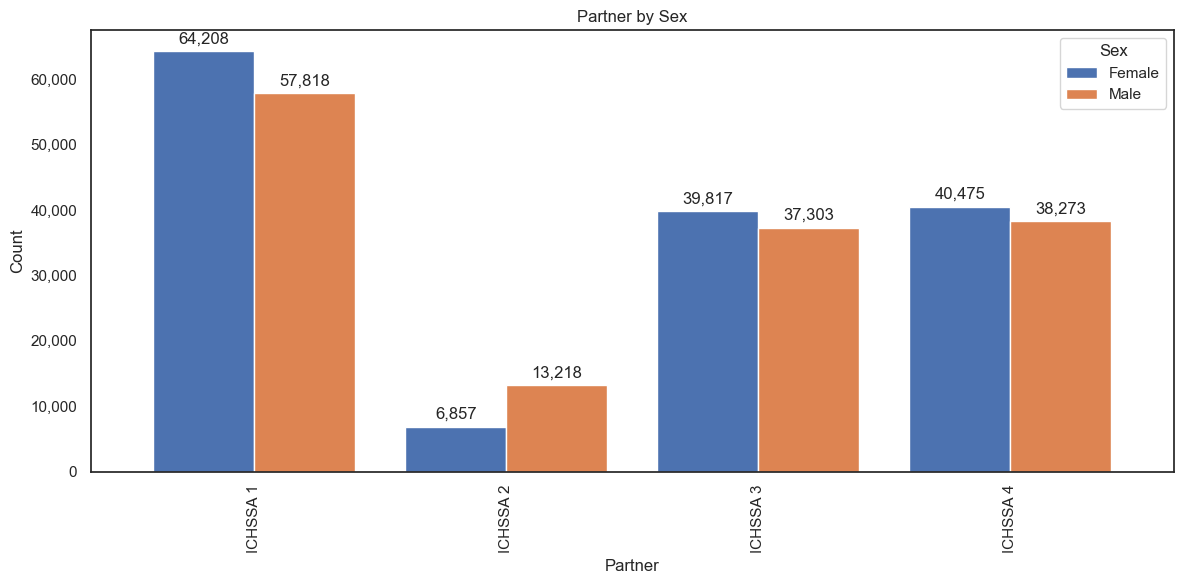

<Figure size 1200x600 with 0 Axes>

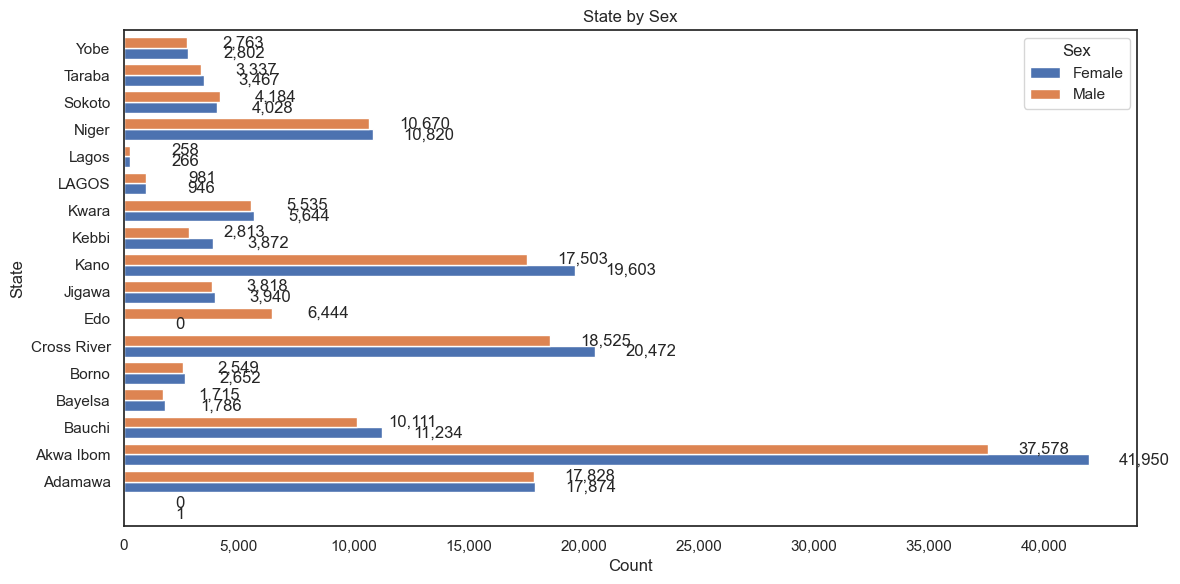

In [77]:
# Set the style for the plots
sns.set(style="white")

# Function to add value annotations with thousand separators
def add_annotations(ax):
    for p in ax.patches:
        value = int(p.get_height())
        if value > 1000:
            value_str = f'{value:,}'
        else:
            value_str = str(value)
        ax.annotate(value_str, 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Plot Partner by Sex
plt.figure(figsize=(12, 6))
ax1 = partner_by_sex.plot(kind='bar', figsize=(12, 6), width=0.8)
ax1.set_title('Partner by Sex')
ax1.set_xlabel('Partner')
ax1.set_ylabel('Count')
ax1.legend(title='Sex')
ax1.grid(False)  # Remove grid lines
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))  # Thousand separator for y-axis
add_annotations(ax1)
plt.tight_layout()
plt.savefig('Partner_by_Sex.png')  # Save the plot
plt.show()

# Plot State by Sex as a horizontal bar chart
plt.figure(figsize=(12, 6))
ax2 = state_by_sex.plot(kind='barh', figsize=(12, 6), width=0.8)
ax2.set_title('State by Sex')
ax2.set_xlabel('Count')
ax2.set_ylabel('State')
ax2.legend(title='Sex')
ax2.grid(False)  # Remove grid lines
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))  # Thousand separator for x-axis

# Add value annotations for horizontal bar chart
for p in ax2.patches:
    value = int(p.get_width())
    if value > 1000:
        value_str = f'{value:,}'
    else:
        value_str = str(value)
    ax2.annotate(value_str, 
                 (p.get_width(), p.get_y() + p.get_height() / 2.), 
                 ha = 'center', va = 'center', 
                 xytext = (40, 0), 
                 textcoords = 'offset points')

plt.tight_layout()
plt.savefig('State_by_Sex.png')  # Save the plot
plt.show()


In [78]:
output_directory = '/Users/seyiabolarin/Desktop/Abstract Analysis/'   # Specify the directory where you want to save the file
output_filename = 'OVC_Analysis.xlsx'
output_file_path = os.path.join(output_directory, output_filename)

with pd.ExcelWriter(output_file_path, engine='xlsxwriter') as writer:
    partner_by_sex.to_excel(writer, sheet_name='Partner by Sex')
    state_by_sex.to_excel(writer, sheet_name='State by Sex')

    workbook  = writer.book
    worksheet1 = writer.sheets['Partner by Sex']
    worksheet2 = writer.sheets['State by Sex']

    # Insert Partner by Sex Plot
    worksheet1.insert_image('G2', 'Partner_by_Sex.png')

    # Insert State by Sex Plot
    worksheet2.insert_image('G2', 'State_by_Sex.png')

print(f"Statistics and plots saved to: {output_file_path}")


Statistics and plots saved to: /Users/seyiabolarin/Desktop/Abstract Analysis/OVC_Analysis.xlsx


In [82]:
# Descriptive statistics for Age
age_stats = OVC['Current Age'].describe()

# Descriptive statistics for Sex
sex_stats = OVC['Sex'].value_counts()

# Convert the statistics to DataFrames for easier plotting
age_stats_df = age_stats.to_frame().transpose()  # Transpose to match the format
sex_stats_df = sex_stats.to_frame().reset_index()
sex_stats_df.columns = ['Sex', 'Count']  # Rename columns for clarity

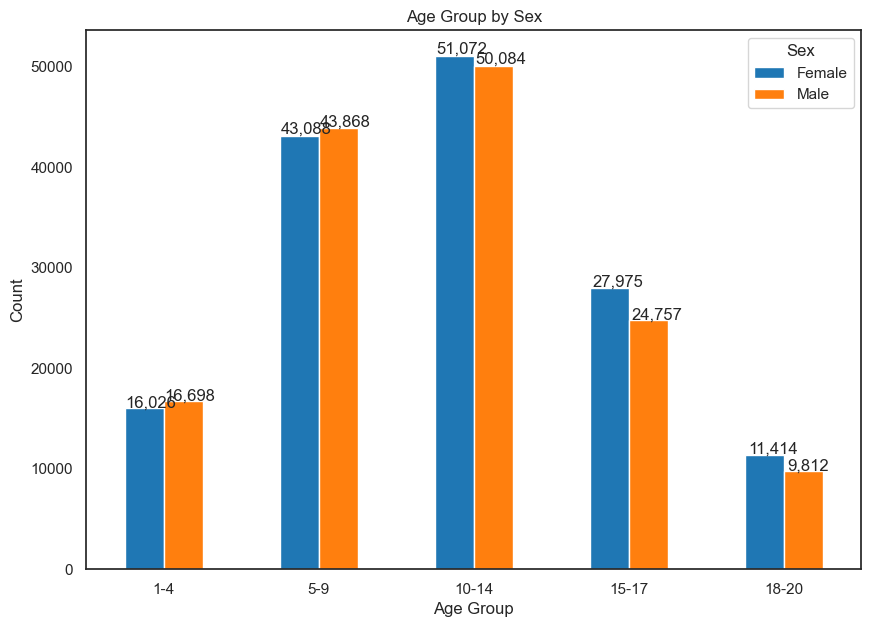

Age group by sex plot saved to: /Users/seyiabolarin/Desktop/Abstract Analysis/Age_Group_by_Sex.png


In [85]:
# Clean the 'Current Age' column
OVC['Current Age'] = pd.to_numeric(OVC['Current Age'], errors='coerce')

# Drop rows with NaN values in 'Current Age'
OVC.dropna(subset=['Current Age'], inplace=True)

# Define the age bins and labels
age_bins = [0, 1, 5, 10, 15, 18, 21]
age_labels = ['<1', '1-4', '5-9', '10-14', '15-17', '18-20']

# Bin the ages
OVC['Age Group'] = pd.cut(OVC['Current Age'], bins=age_bins, labels=age_labels, right=False)

# Create a crosstab of Age Group and Sex
age_sex_crosstab = pd.crosstab(OVC['Age Group'], OVC['Sex'])

# Plot the crosstab
ax = age_sex_crosstab.plot(kind='bar', figsize=(10, 7), color=['#1f77b4', '#ff7f0e'])

# Customize the plot
plt.title('Age Group by Sex')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Sex')
plt.grid(False)

# Annotate the bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x() * 1.005, p.get_height() * 1.005))

# Save the plot
output_plot_path = '/Users/seyiabolarin/Desktop/Abstract Analysis/Age_Group_by_Sex.png'
plt.savefig(output_plot_path)

plt.show()

print(f"Age group by sex plot saved to: {output_plot_path}")

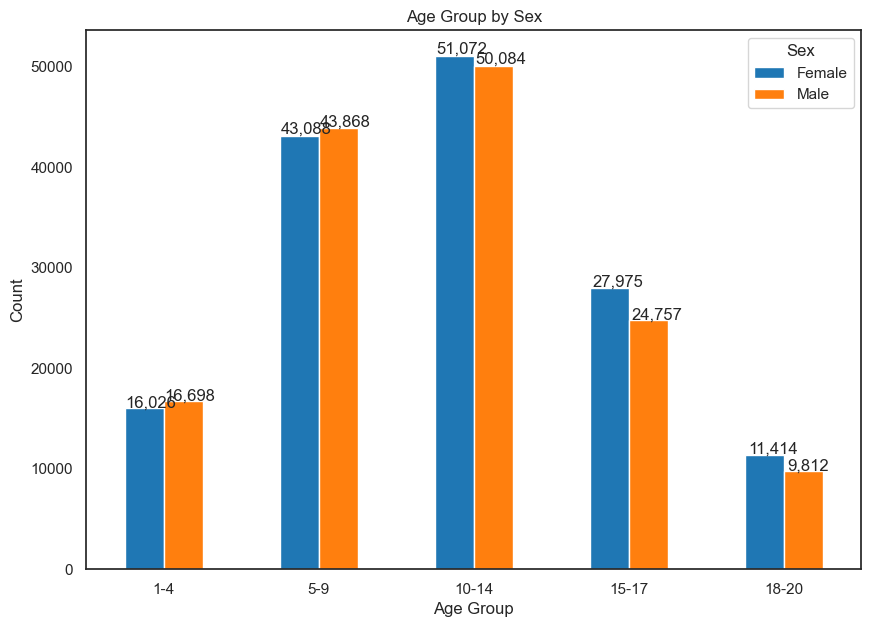

Age group by sex plot saved to: /Users/seyiabolarin/Desktop/Abstract Analysis/Age_Group_by_Sex.png
Age group by sex crosstab saved to: /Users/seyiabolarin/Desktop/Abstract Analysis/Age_Sex_Crosstab.xlsx


In [86]:
# Clean the 'Current Age' column
OVC['Current Age'] = pd.to_numeric(OVC['Current Age'], errors='coerce')

# Drop rows with NaN values in 'Current Age'
OVC.dropna(subset=['Current Age'], inplace=True)

# Define the age bins and labels
age_bins = [0, 1, 5, 10, 15, 18, 21]
age_labels = ['<1', '1-4', '5-9', '10-14', '15-17', '18-20']

# Bin the ages
OVC['Age Group'] = pd.cut(OVC['Current Age'], bins=age_bins, labels=age_labels, right=False)

# Create a crosstab of Age Group and Sex
age_sex_crosstab = pd.crosstab(OVC['Age Group'], OVC['Sex'])

# Plot the crosstab
ax = age_sex_crosstab.plot(kind='bar', figsize=(10, 7), color=['#1f77b4', '#ff7f0e'])

# Customize the plot
plt.title('Age Group by Sex')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Sex')
plt.grid(False)

# Annotate the bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x() * 1.005, p.get_height() * 1.005))

# Save the plot
output_plot_path = '/Users/seyiabolarin/Desktop/Abstract Analysis/Age_Group_by_Sex.png'
plt.savefig(output_plot_path)

plt.show()

print(f"Age group by sex plot saved to: {output_plot_path}")

# Save the crosstab to an Excel file
output_excel_path = '/Users/seyiabolarin/Desktop/Abstract Analysis/Age_Sex_Crosstab.xlsx'
age_sex_crosstab.to_excel(output_excel_path)

print(f"Age group by sex crosstab saved to: {output_excel_path}")